<a href="https://colab.research.google.com/github/anilbhatt-DataAnalyst/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

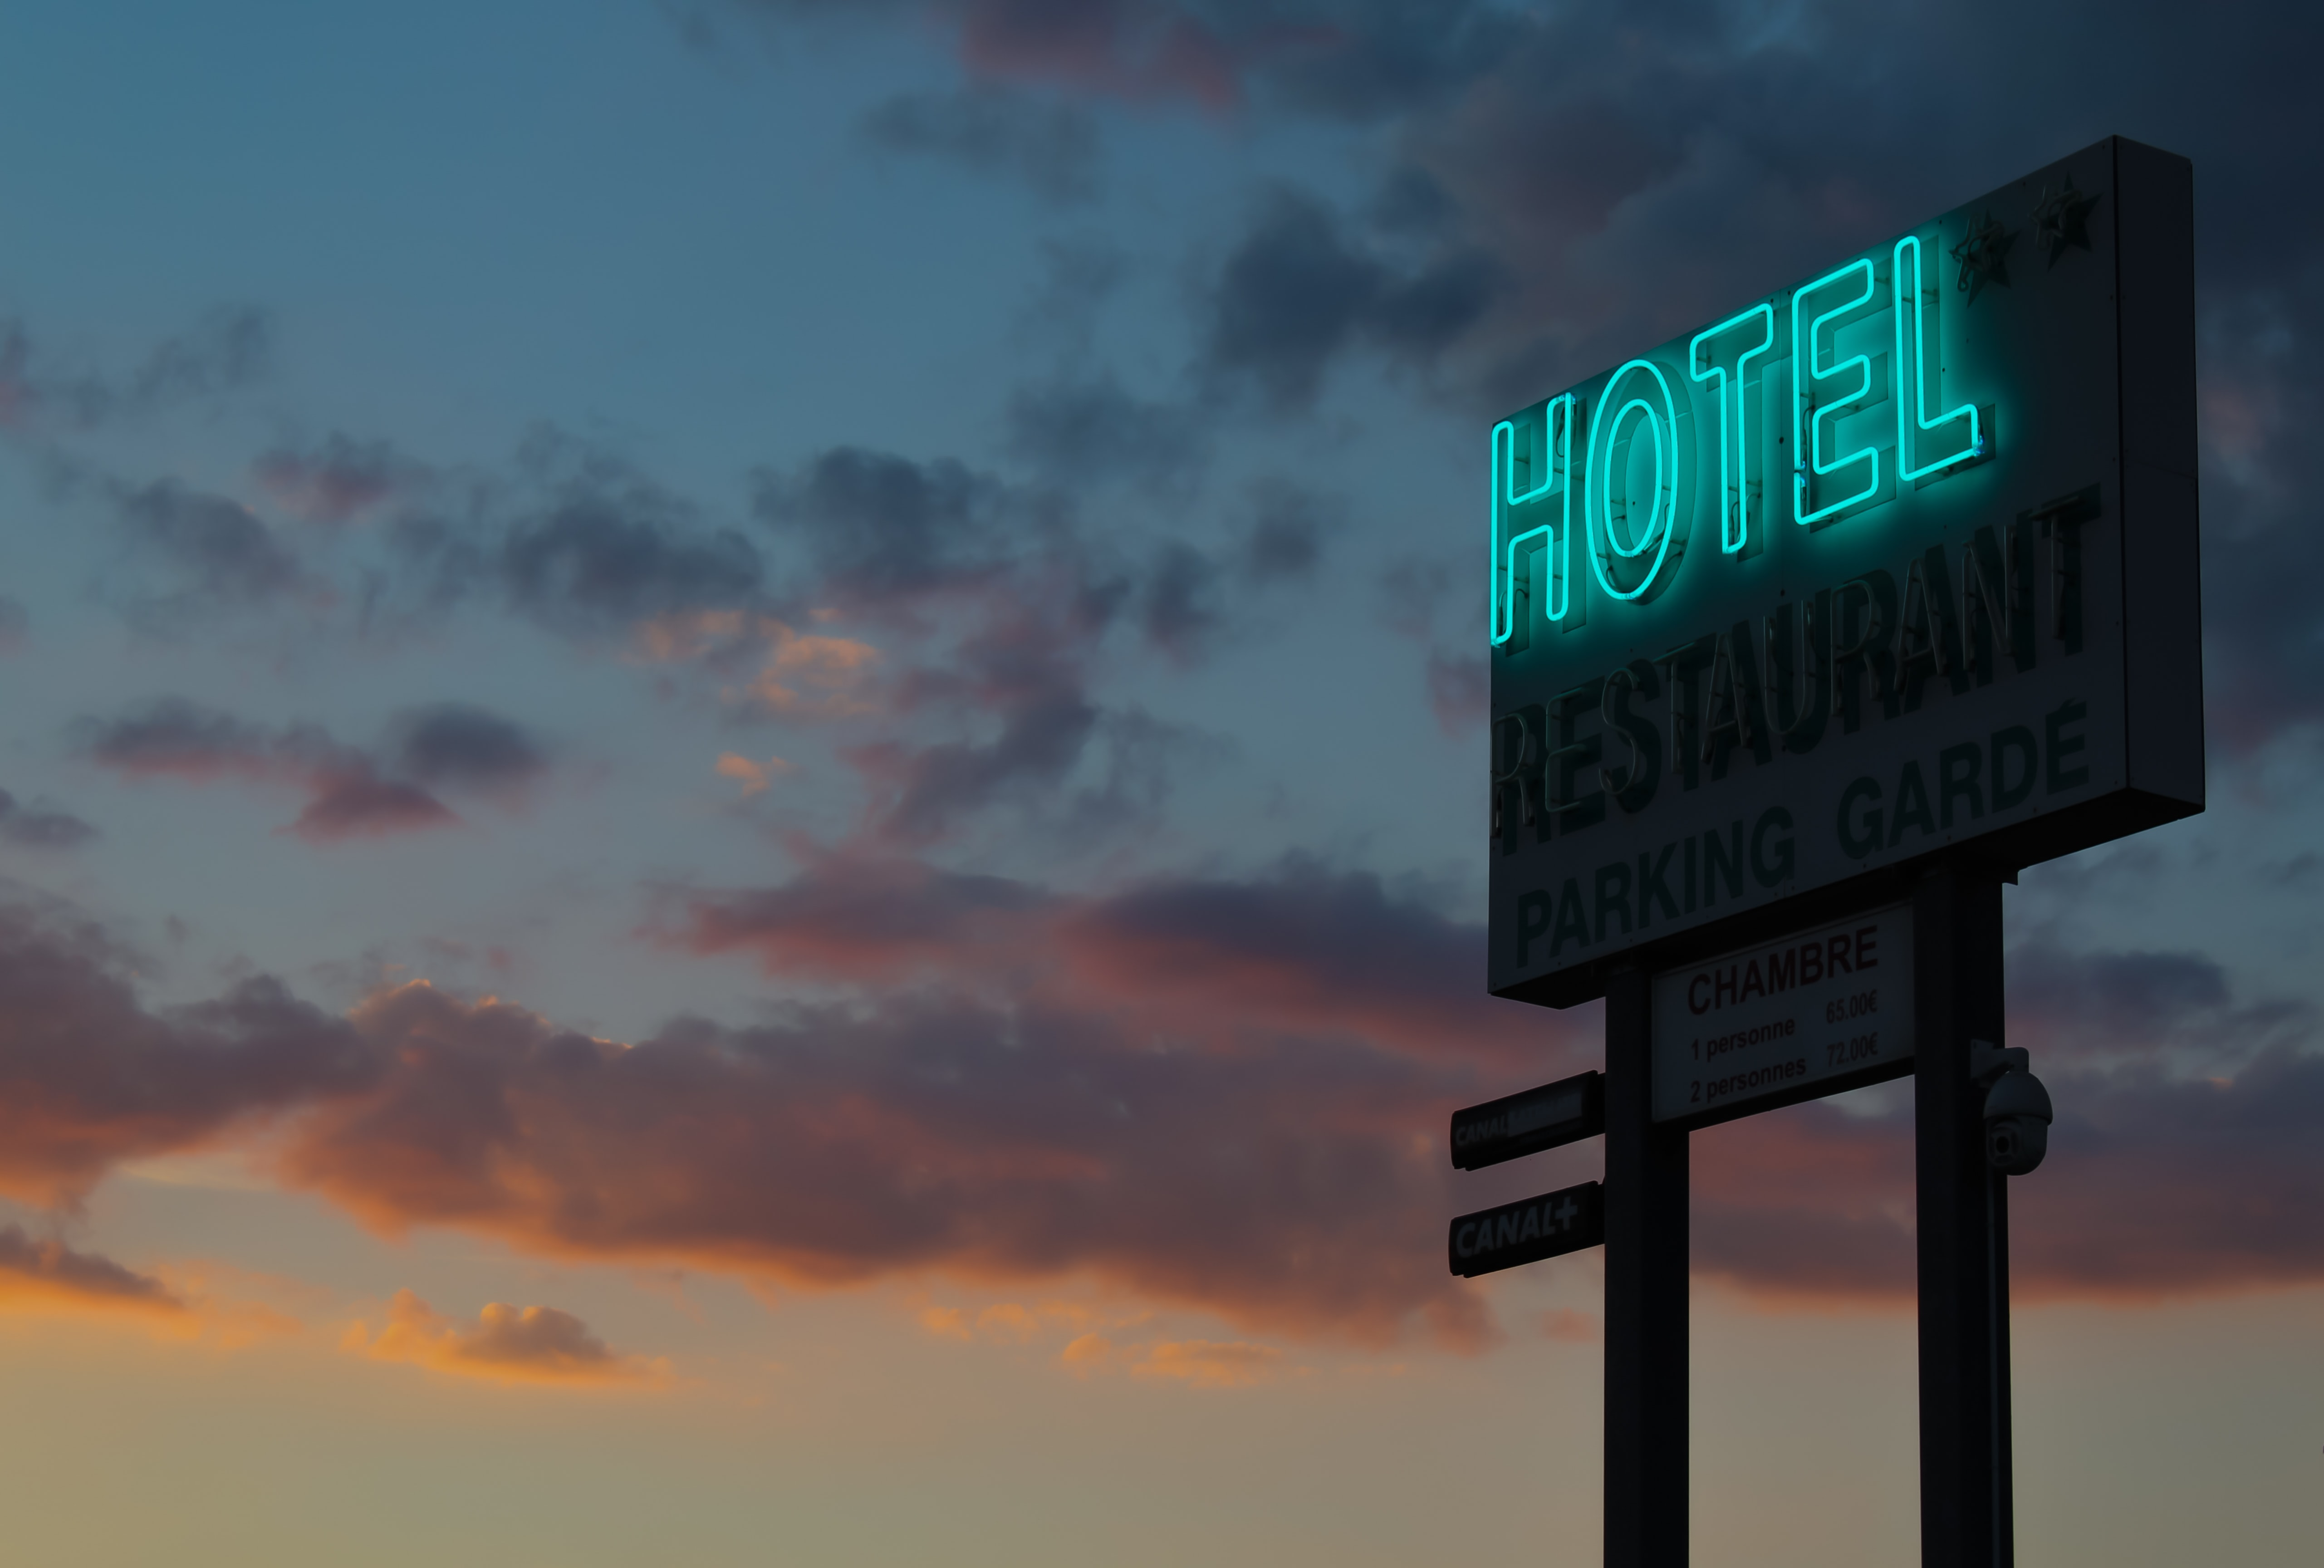

## <b> Let's explore and analyze the data to discover important factors that govern the bookings. </b>

### <b> Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import ast 
from datetime import datetime
import math


### <b> Loading data set

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Booking Analysis - Anil Bhatt/hotel_bookings.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b> Exploring the Data

In [3]:
# Shape of the Dataset

df.shape

(119390, 32)

In [4]:
# Information about dataset such as no.of columns, rows, data type, non-null values..so on & so forth.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# checking first 5 rows

df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# checking last 5 rows
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
# stastical data of dataset

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
# Creating a copy of a dataset

df_new = df.copy()

In [9]:
# Finding unique values in all columns
df_new.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [10]:
# using loop we can find these unique values contain object data type

categorical_cols=list(set(df_new.drop(columns=['reservation_status_date','country','arrival_date_month']).columns) - set(df_new.describe()))
for col in categorical_cols:
  print(col ,':', df_new[col].unique())

customer_type : ['Transient' 'Contract' 'Transient-Party' 'Group']
distribution_channel : ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
reserved_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
assigned_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
deposit_type : ['No Deposit' 'Refundable' 'Non Refund']
market_segment : ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
reservation_status : ['Check-Out' 'Canceled' 'No-Show']
hotel : ['Resort Hotel' 'City Hotel']


In [11]:
# Also we can Find unique values in dataset using this code 
# df_new['column_name'].unique()
# but this method won't work on large no of columns

### <b> Name of columns which contains unique data
1. assigned_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
2. reserved_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
3. market_segment : ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
4. reservation_status : ['Check-Out' 'Canceled' 'No-Show']
5. hotel : ['Resort Hotel' 'City Hotel']
6. meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
7. deposit_type : ['No Deposit' 'Refundable' 'Non Refund']
8. distribution_channel : ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
9. customer_type : ['Transient' 'Contract' 'Transient-Party' 'Group']


### <b> Data cleaning 

In [12]:
# Finding duplicates True = duplicated value
df_new.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [13]:
# droping duplicates

df_new = df_new.drop_duplicates()

In [14]:
# Ensuring the column was dropped or not.

df_new.shape

(87396, 32)

In [15]:
# Finding null values

df_new.isnull().sum().sort_values(ascending = False)[:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

In [16]:
# Dealing with null-values 
# 1. filling null values with 0 in company and agent column 
df_new[['company','agent']] = df_new[['company','agent']].fillna(0)

# 2. filling null values with others in country 
df_new['country'] = df_new['country'].fillna('others')

# 3. filling null values with mean of childrens
df_new['children'].fillna(df_new['children'].mean(), inplace = True)


In [17]:
# checking null value is replaced or not 

df_new.isnull().sum().sort_values(ascending = False) [:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [18]:
# Changing Datatype of some columns

df_new['reservation_status_date'] = pd.to_datetime(df_new['reservation_status_date'], format = '%Y-%m-%d')

df_new[['children', 'company', 'agent']] = df_new[['children', 'company', 'agent']].astype('int64')

In [19]:
# Droping 166 rows containing children , adult, and babies is equal to zero because it makes no sense.

len(df_new[df_new['adults'] +df_new['children'] +df_new ['babies'] == 0])

df_new.drop(df_new[df_new['adults'] +df_new['children'] +df_new ['babies'] == 0].index , inplace= True)

In [20]:
# Adding new column by combining some existing columns

df_new['total people']= df_new['adults'] +df_new['children'] +df_new ['babies']
df_new['total stayed'] = df_new['stays_in_weekend_nights'] + df_new['stays_in_week_nights']   

In [21]:
df_new.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total people,total stayed
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0


In [22]:
df_new.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total people,total stayed
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,...,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.275238,79.971019,2016.210352,26.835091,15.815832,1.004609,2.623925,1.879365,0.138897,0.010845,...,0.184054,0.268497,81.089258,10.984948,0.746291,106.518031,0.084306,0.698934,2.029107,3.628534
std,0.446637,86.058683,0.686064,13.669216,8.835545,1.027408,2.039830,0.621724,0.456265,0.113704,...,1.733033,0.710633,109.977255,53.956668,10.001001,54.891227,0.281659,0.832051,0.790141,2.742948
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000,2.000000,3.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2.000000,5.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,69.000000


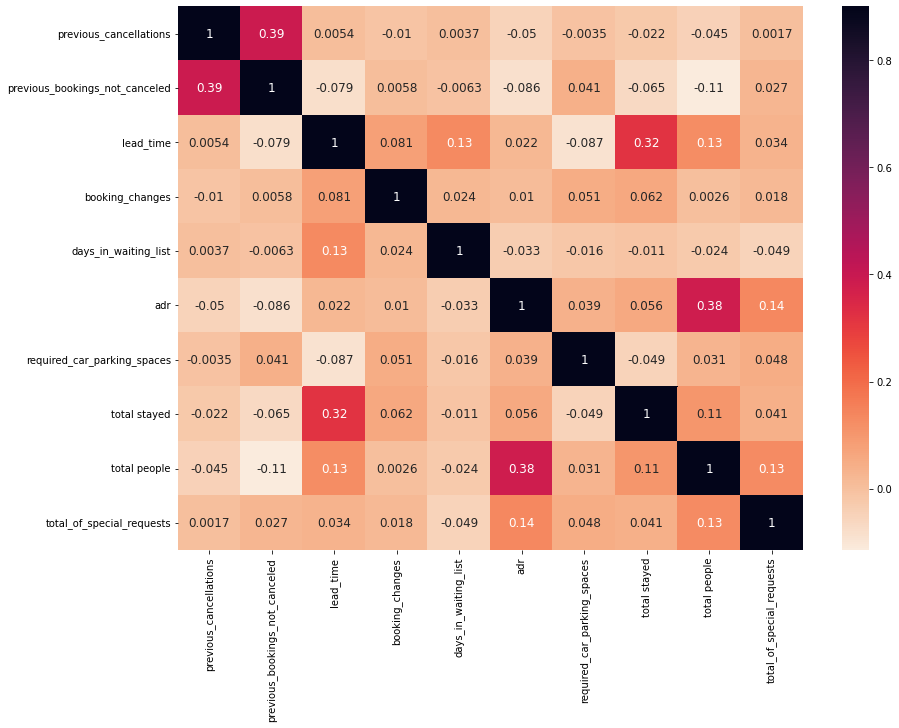

In [23]:
# Checking correlation between meaningfull values in data frame

numeric_values = df_new[['previous_cancellations','previous_bookings_not_canceled','lead_time','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total stayed','total people','total_of_special_requests']]
co_relation_matrix = numeric_values.corr()
f, ax = plt.subplots(figsize=(14,10))
sns.heatmap(co_relation_matrix, fmt='.2g',cmap= 'rocket_r',annot = True, annot_kws={'size': 12},  vmax = .9 )


### <b> Observations from Correlation Matrix:

* For longer duration of stays people generally plan little before the actual arrival.
* Around 13% of total people have made a special request in their booking.
* Barely any transaction have occurred which led to cancellation afterwards.

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 <a list of 8 Text major ticklabel objects>)

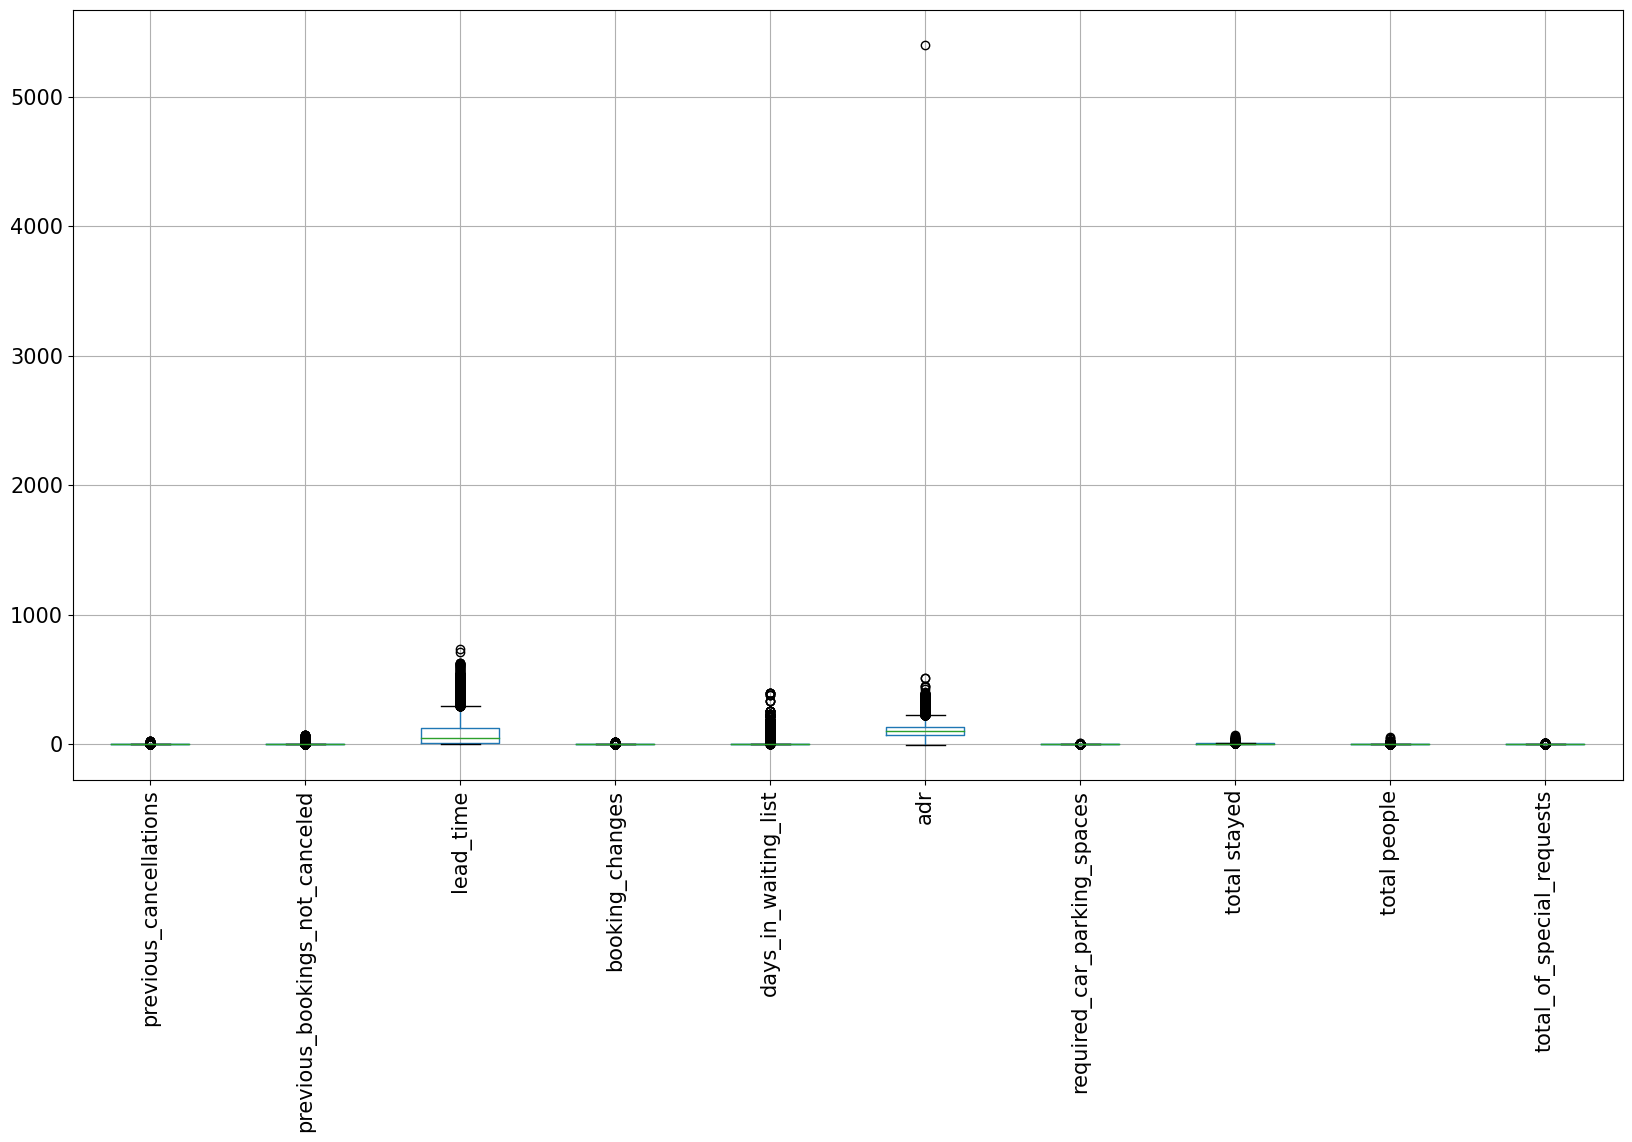

In [24]:
# identidying outliers
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
numeric_values.boxplot()
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

**Here we see in column adr the value is beyond normal range so it indicates that value is a outlier.**

In [25]:
# Removing outliers

df_new.drop(df_new[df_new['adr'] > 5000].index, inplace = True) 

## <b> EDA [Exploratory Data Analysis]

### <b> 1. Booking percentage of hotels

---



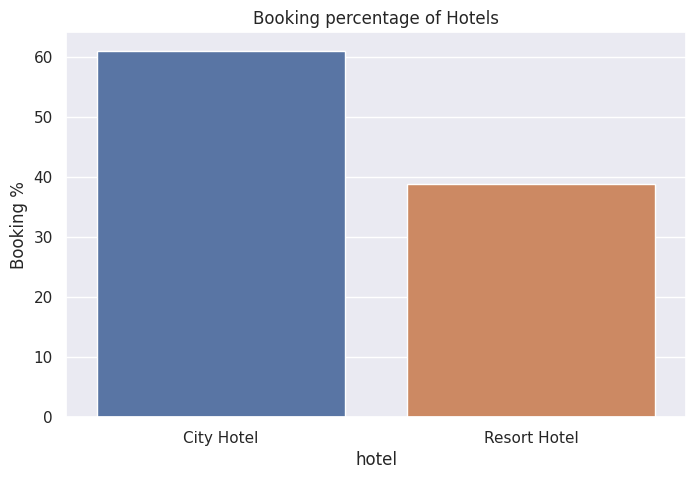

In [26]:
# Making dataframe for booking percentage of Hotels
groupby_hotel = df_new.groupby('hotel')

d1 = (pd.DataFrame((groupby_hotel.size()/df_new.shape[0])*100)
        .reset_index().rename(columns = {0:'Booking %'}))

# plotting graph
sns.set_theme(style="darkgrid")
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.title('Booking percentage of Hotels')
plt.show()


**Observation** : 

* Around 60% people prefer City hotel and 40% people prefer Resort hotel.

### <b> 2. Which Agent makes most no. of bookings

In [27]:
# Making dataframe of most num of booking by agent
highest_booking = pd.DataFrame(df_new['agent'].value_counts()).reset_index()
naming_columns = highest_booking.rename(columns = {'index' : 'agent', 'agent': 'num_of_bookings'})
naming_columns.sort_values(by = 'num_of_bookings', ascending = False)

# Dropping 0 in the agent columns coz 0 means no bookings were made
naming_columns.drop(naming_columns[naming_columns['agent']==0].index , inplace = True)

# picking top 10 top booking agent
top_booking_agent = naming_columns[:10]

Text(0.5, 1.0, 'Bookings made by agent')

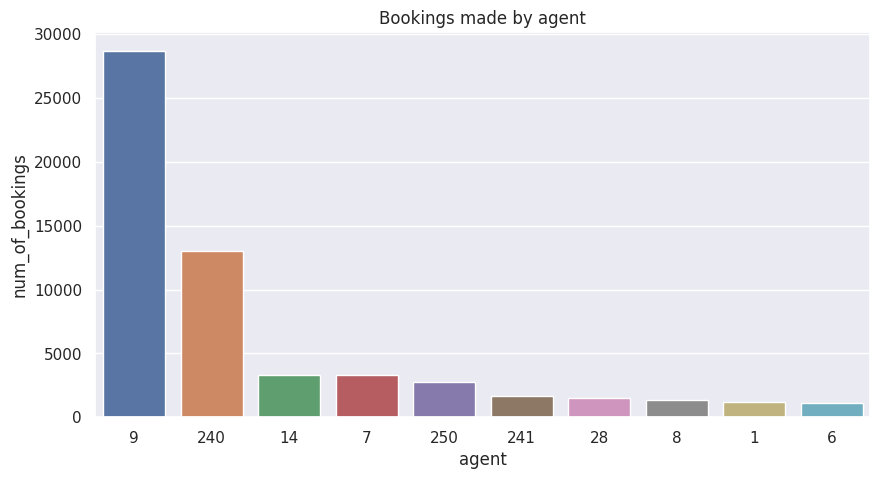

In [28]:
#plotting graph
plt.figure(figsize= (10,5))
sns.barplot(x = top_booking_agent['agent'], y = top_booking_agent['num_of_bookings'],order = top_booking_agent['agent'])
plt.title('Bookings made by agent')

**Observation** : 

* Agent no.9 makes most of the bookings.



### <b> 3.Most prefered meal by customers.

In [29]:
# Most prefrerd meal dataset
prefered_meal = (pd.DataFrame(df_new['meal'].value_counts().reset_index())
.rename(columns = {'index':'Types of meal', 'meal':'No.of Meals'}))
prefered_meal

,Types of meal,No.of Meals
0,BB,67906
1,SC,9391
2,HB,9080
3,Undefined,492
4,FB,360


Text(0.5, 1.0, 'Most prefered meals by customers')

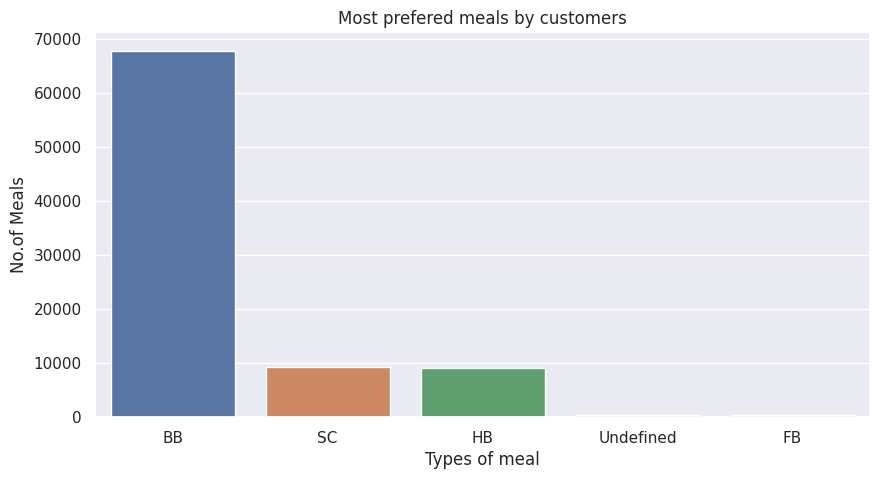

In [30]:
# Plotting Graph
plt.figure(figsize= (10,5))
sns.barplot(x = prefered_meal['Types of meal'], y = prefered_meal['No.of Meals'], order=prefered_meal['Types of meal'])
plt.title('Most prefered meals by customers')

* Types of meal:
     
     1.BB - (Bed and Breakfast)
     2.HB - (Half Bread)
     3.FB - (Full Board)
     4.SC - (Self Catering)

**Observation** : 

* Above chart shows most of the customers prefer BB type Meal.


### <b> 4. What is the percentage distribution of "Customer Type"? 

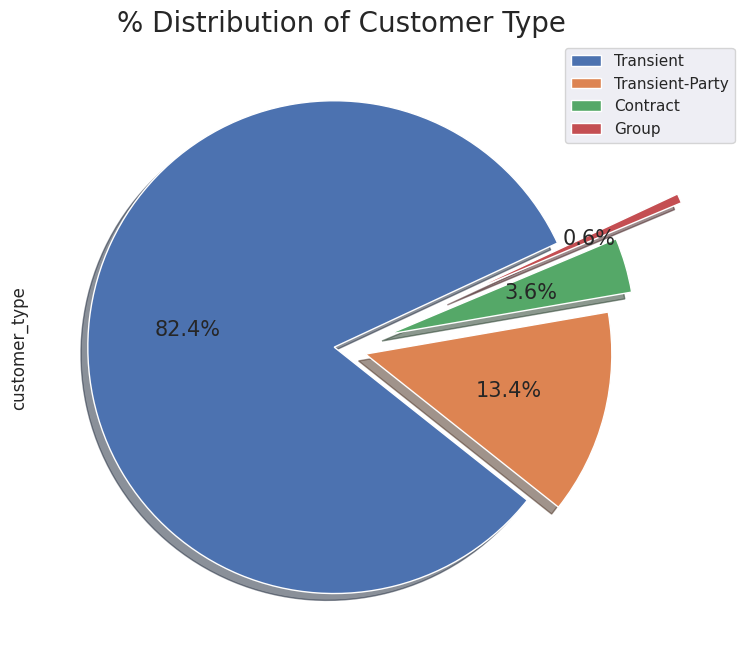

In [31]:
df_new['customer_type'].value_counts().plot.pie(explode=[0.03,0.1,0.2,0.5],autopct='%1.1f%%',shadow = True, figsize=(12,8),fontsize=15,labels=None, startangle=25)
labels=df_new['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type',fontsize= 20)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

**Observation** : 

* Transient customer type is more which is 82.4 %. Percentage of  Booking associated by the Group is vey low.

### <b> 5. Hotel cancelation rate

Text(0, 0.5, '')

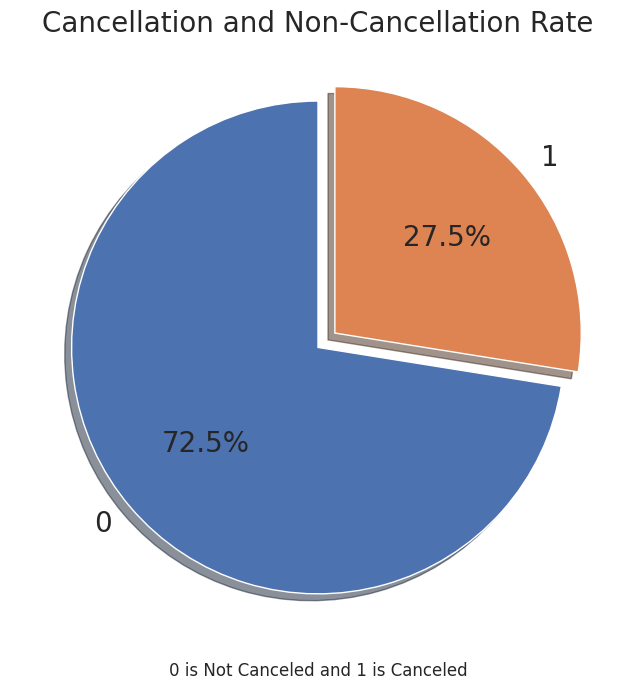

In [32]:
df_new['is_canceled'].value_counts().plot.pie( explode = [0.0, 0.09], startangle=90,autopct='%1.1f%%',shadow = True, figsize=(8,8),fontsize=20)
plt.title('Cancellation and Non-Cancellation Rate', fontsize=20)
plt.xlabel('0 is Not Canceled and 1 is Canceled')
plt.ylabel('')

**Observation** : 

* 27.5% people cancelled their booking. We have to find out reasons why these people cancelled their bookings. Also feedback can be taken from guests who cancel their bookings.

### <b> 6. Which distribution channel is used by customer for hotel booking?

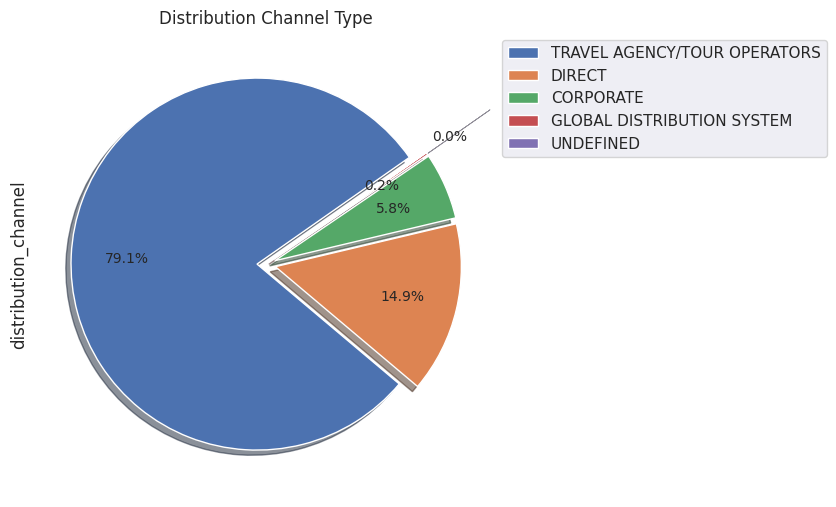

In [33]:
distribution_type=df_new['distribution_channel'].value_counts()
myexplode=[0.05,0.05,0.05,0.05,0.5]

label=['TRAVEL AGENCY/TOUR OPERATORS', 'DIRECT','CORPORATE' ,'GLOBAL DISTRIBUTION SYSTEM','UNDEFINED']
distribution_type.plot.pie( figsize=(6,8),  fontsize=10, shadow = True, explode=myexplode, autopct='%1.1f%%',pctdistance=0.7,labels=None , startangle=35)
plt.title('Distribution Channel Type')
plt.legend(bbox_to_anchor=(0.99, 1),labels=label, loc = 'upper left')
plt.show()

**Observation** : 

* 79.1% customer uses Travel Agency (TA)/Tour Operators(TO).

* 14.9% customers direct book hotel.

* 5.8% customers booking through Corporate.

* 0.2% booking comes through Global Distribution System.

### <b> 7. Percentage of Booking changes made by the customer.

Text(0, 0.5, 'Percentage(%)')

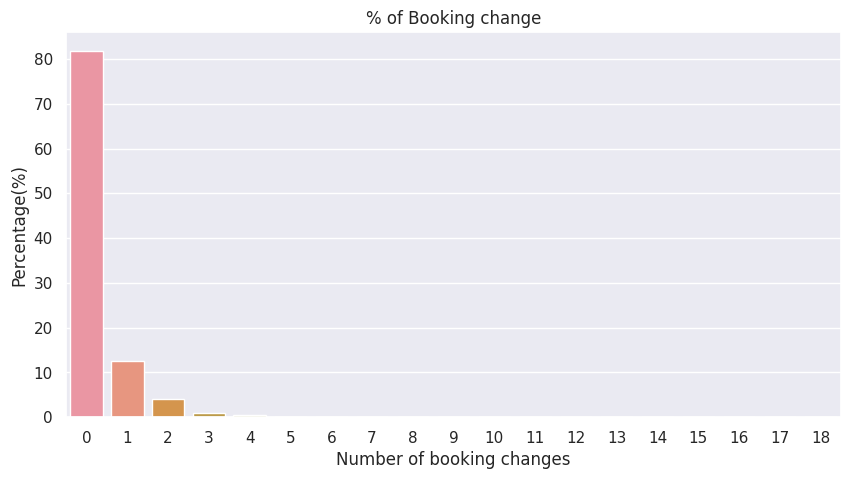

In [34]:
booking_changes=df_new['booking_changes'].value_counts().reset_index().rename(columns={'index':'Num of bookings changes', 'booking_changes':'counts'})
plt.figure(figsize = (10,5))
sns.barplot(x=booking_changes['Num of bookings changes'], y=booking_changes['counts']*100/df_new.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

**Observation** : 

* Almost 82% of the bookings were not changed by guests.

### <b> 8. From which country, guest visited the most.

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

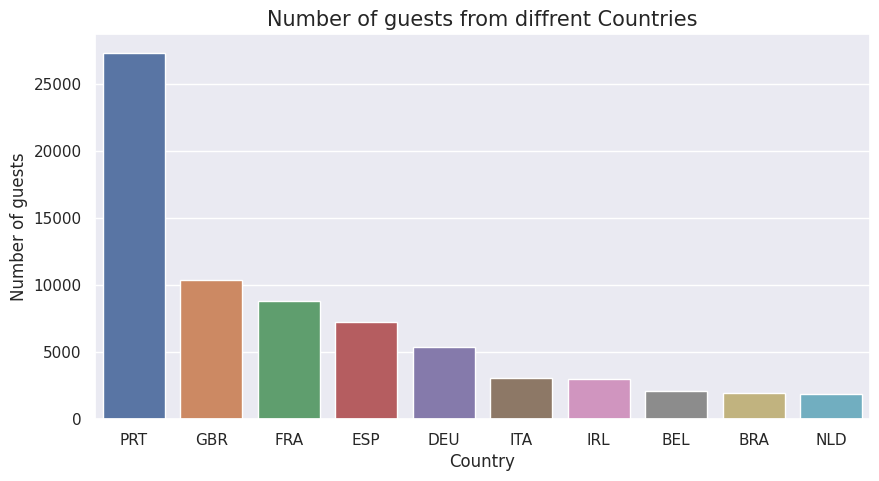

In [35]:
guest_by_country = df_new['country'].value_counts().reset_index()[:10].rename(columns={'index': 'Country' , 'country':'Num_of_visits'})
plt.figure(figsize=(10,5))
sns.barplot(x= guest_by_country['Country'],y= guest_by_country['Num_of_visits'], order = guest_by_country['Country'])
plt.ylabel('Number of guests',fontsize=12)
plt.xlabel('Country',fontsize=12)
plt.title("Number of guests from diffrent Countries",fontsize=15)

Abbrevations for Countries-

1.PRT - Portugal

2.GBR - United Kingdom

3.FRA - France

4.ESP - Spain

5.DEU - Germany

6.ITA - Italy

7.IRL - Ireland

8.BEL - Belgium

9.BRA - Brazil

10.NLD - Netherlands


**Observation** : 

* Most of the guests are coming from portugal, i.e., more than 25,000 guests are from portugal.

### <b> 9.  Which year had the highest bookings?

Text(0.5, 1.0, 'Year Wise Bookings')

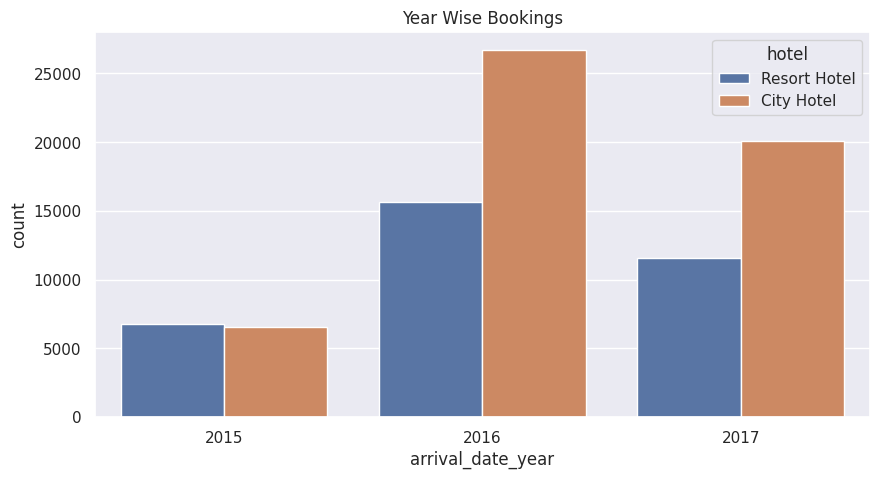

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x= df_new['arrival_date_year'],hue = df['hotel'])
plt.title("Year Wise Bookings")

**Observation** : 

* 2015 had less 7000 bookings.

* 2016 had the higest bookings.

* Overall, City Hotels had the most of the bookings.

### <b> 10. In which month most of the bookings happened?

Text(0.5, 0, 'MONTHS')

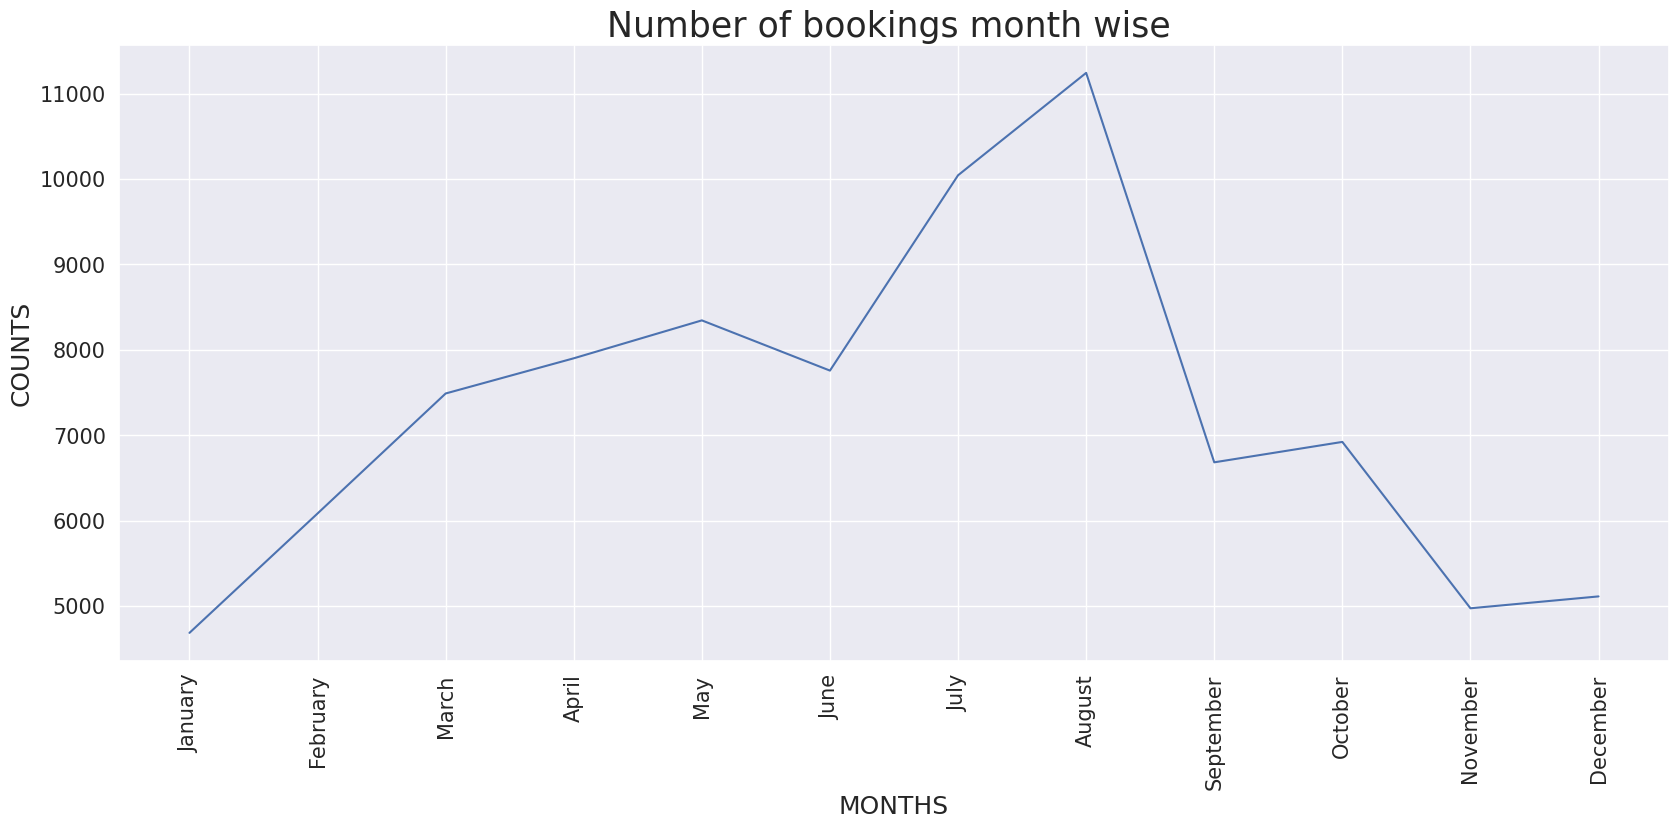

In [37]:
# Grouping by
Booking_by_month = df_new.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns= {'hotel':'Counts', 'arrival_date_month': 'Months'})

# list of months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# sorting dataframe by months
Booking_by_month['Months'] = pd.Categorical(Booking_by_month['Months'], categories = months, ordered = True )

sns.set_theme(style="darkgrid")
# plotting graph 
plt.figure(figsize = (20,8))
sns.lineplot(x = Booking_by_month['Months'],y = Booking_by_month['Counts'])
plt.title('Number of bookings month wise ', fontsize=25)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('COUNTS',fontsize=18)
plt.xlabel('MONTHS',fontsize=18)

**Observation** : 

* July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.

### <b> 11. Most preferred room type by the customers

Text(0.5, 1.0, 'Most prefered Room Types')

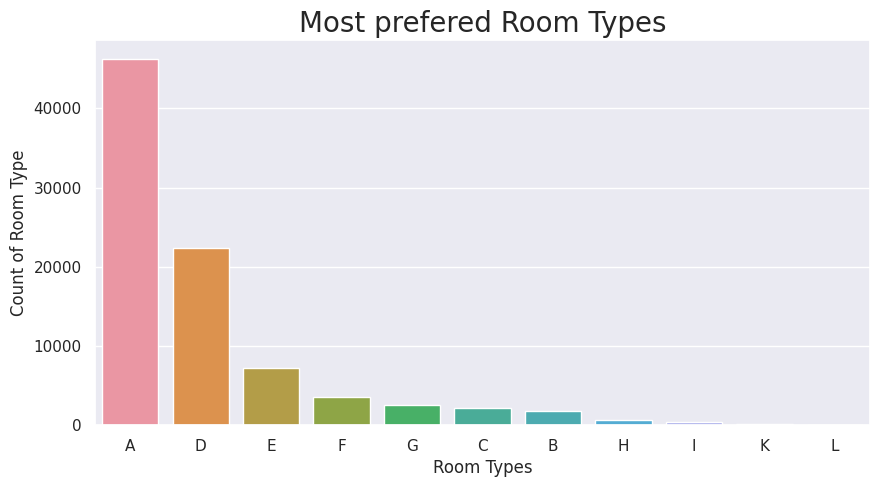

In [38]:
plt.figure(figsize = (10,5))
sns.countplot(x = df_new['assigned_room_type'], order = df_new['assigned_room_type'].value_counts().index)
plt.ylabel('Count of Room Type')
plt.xlabel ('Room Types')
plt.title('Most prefered Room Types', fontsize=20)

**Observation** : 

* Most preferred Room type is 'A'.

### <b> 12. count of repeated guest?

Text(0.5, 1.0, 'percent')

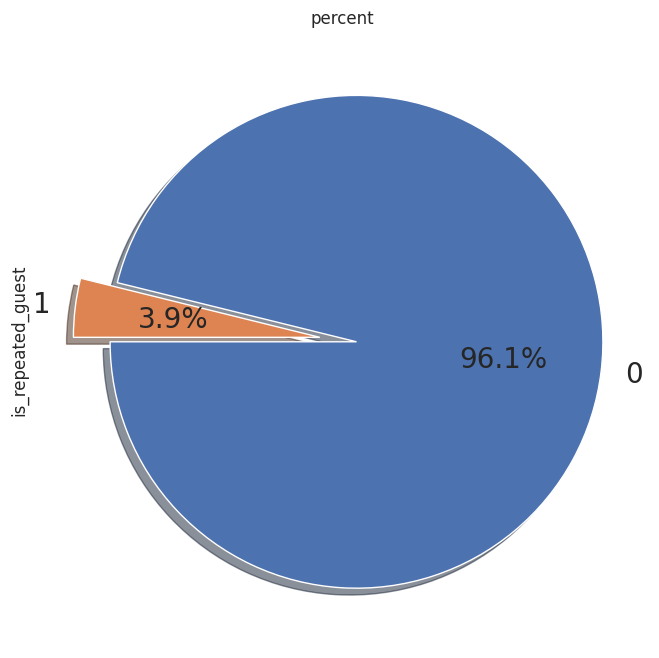

In [39]:
df_new['is_repeated_guest'].value_counts().plot.pie(explode=(0.06,0.09),startangle=180, shadow = True ,autopct='%1.1f%%',figsize=(12,8),fontsize=20)
plt.title('percent')

**Observation:**

* Repeated guests are very few which only 3.9 %.

* In order to retain the guests, management should take feedbacks from guests and try to improve the services.

### <b> 13. What is Percentage distribution of Deposite type ?

Text(0, 0.5, '')

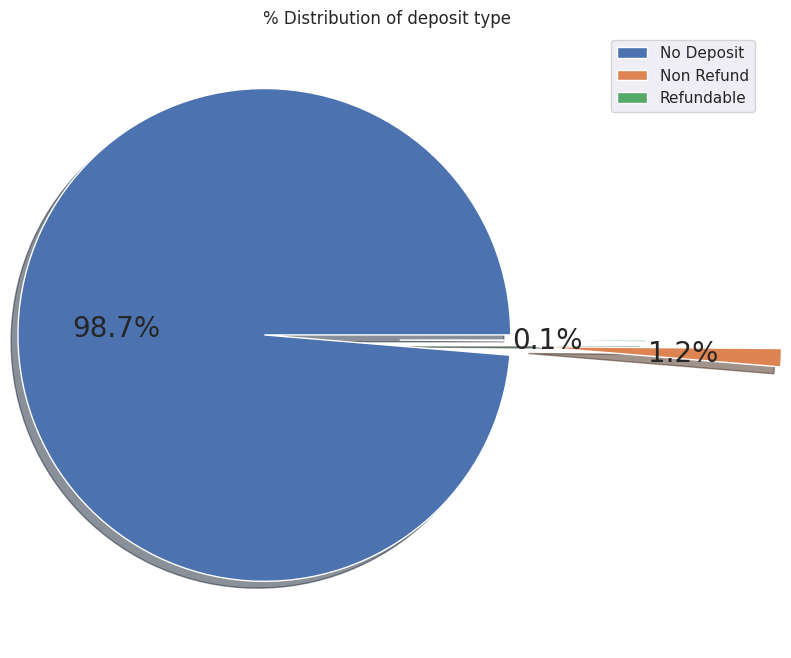

In [40]:
df_new['deposit_type'].value_counts().plot.pie(explode=(0.5,0.6,0.05),autopct='%1.1f%%',shadow=True,figsize=(14,8),fontsize=20,labels=None)
plt.title("% Distribution of deposit type")
labels=df_new['deposit_type'].value_counts().index.tolist()
plt.legend( bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.ylabel('')

**Observation** : 

* 98.7 % of the guests prefer "No deposit" type of deposit.

### <b> 14. Which Hotel type has the highest ADR?

In [41]:
highest_ADR = pd.DataFrame(df_new.groupby(['hotel']) ['adr'].mean().reset_index())

In [42]:
highest_ADR

,hotel,adr
0,City Hotel,111.172693
1,Resort Hotel,99.059517


Text(0.5, 1.0, 'Avg ADR of hotel type')

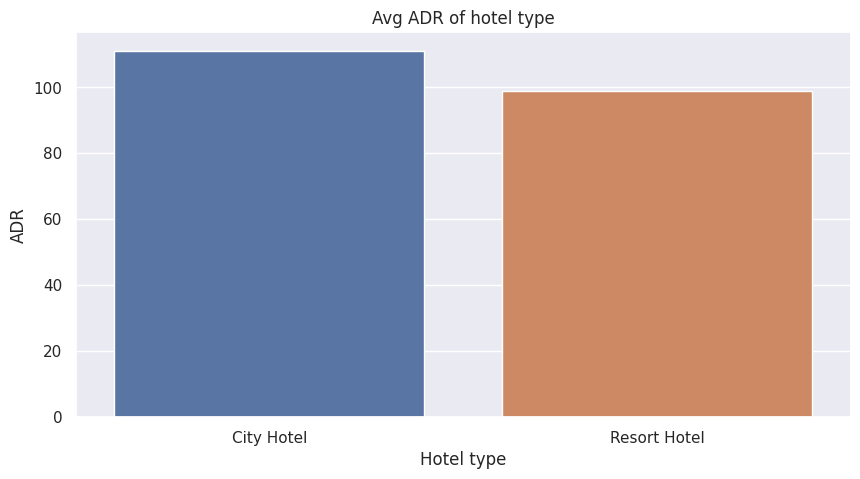

In [43]:
plt.figure(figsize= (10,5))
sns.barplot(x = highest_ADR['hotel'], y= highest_ADR['adr'])
plt.xlabel('Hotel type')
plt.ylabel ('ADR')
plt.title ('Avg ADR of hotel type')

**Observation** : 

* City Hotel has the highest ADR. This means City Hotels are generating more revenue than the resort hotels. More the ADR, more is the revenue.

### <b> 15. Which Hotel Type has more lead time?

Text(0.5, 1.0, 'Average lead time for each hotel type')

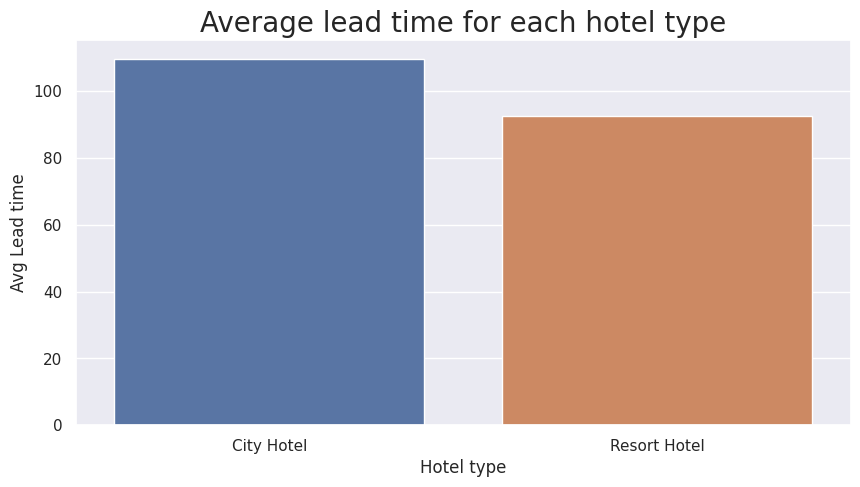

In [44]:
# group by with hotel and lead time
avg_lead_time = pd.DataFrame(df.groupby(['hotel'])['lead_time'].mean()).reset_index()

# Plotting the graph 
plt.figure(figsize=(10,5))
sns.barplot(x= avg_lead_time['hotel'], y = avg_lead_time['lead_time'])
plt.xlabel('Hotel type')
plt.ylabel('Avg Lead time')
plt.title ('Average lead time for each hotel type', fontsize = 20)

**Observation** : 

* City hotel has more lead time than resort hotel.

### <b> 16. ADR across the different month.

Text(0.5, 0, 'MONTHS')

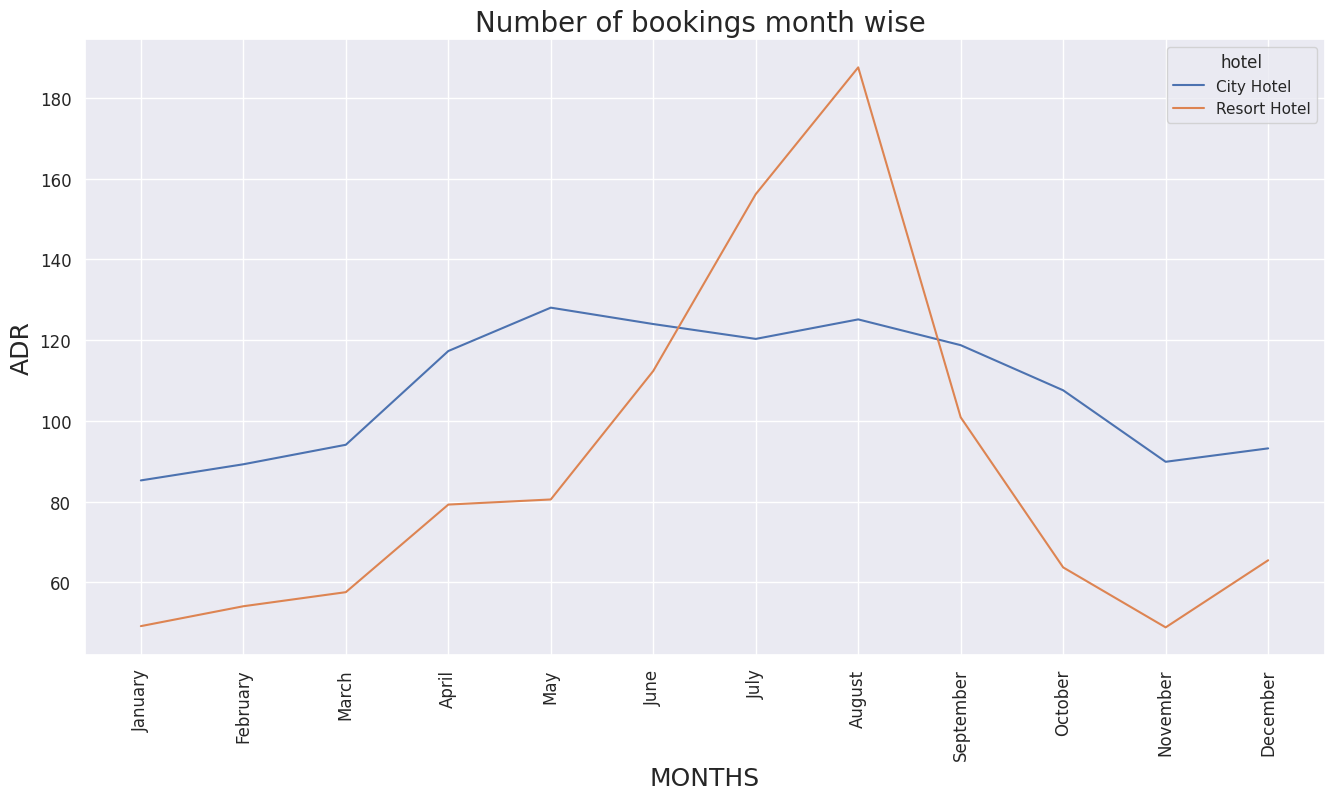

In [45]:
# Grouping by
ADR_by_month = df_new.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index().rename(columns= {'Counts': 'Hotel Type' , 'arrival_date_month': 'Months'})
ADR_by_month
# list of months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# sorting dataframe by months
ADR_by_month['Months'] = pd.Categorical(ADR_by_month['Months'], categories = months, ordered = True )

# plotting graph 
plt.figure(figsize = (16,8))
sns.lineplot(x = ADR_by_month['Months'],y = ADR_by_month['adr'],hue=ADR_by_month['hotel'])
plt.title('Number of bookings month wise ', fontsize=20)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.ylabel('ADR',fontsize=18)
plt.xlabel('MONTHS',fontsize=18)

**Observation** : 

* For Resort Hotel, ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

* The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

### <b> 17. Is there any preferance for the "Reserved Room Type"?

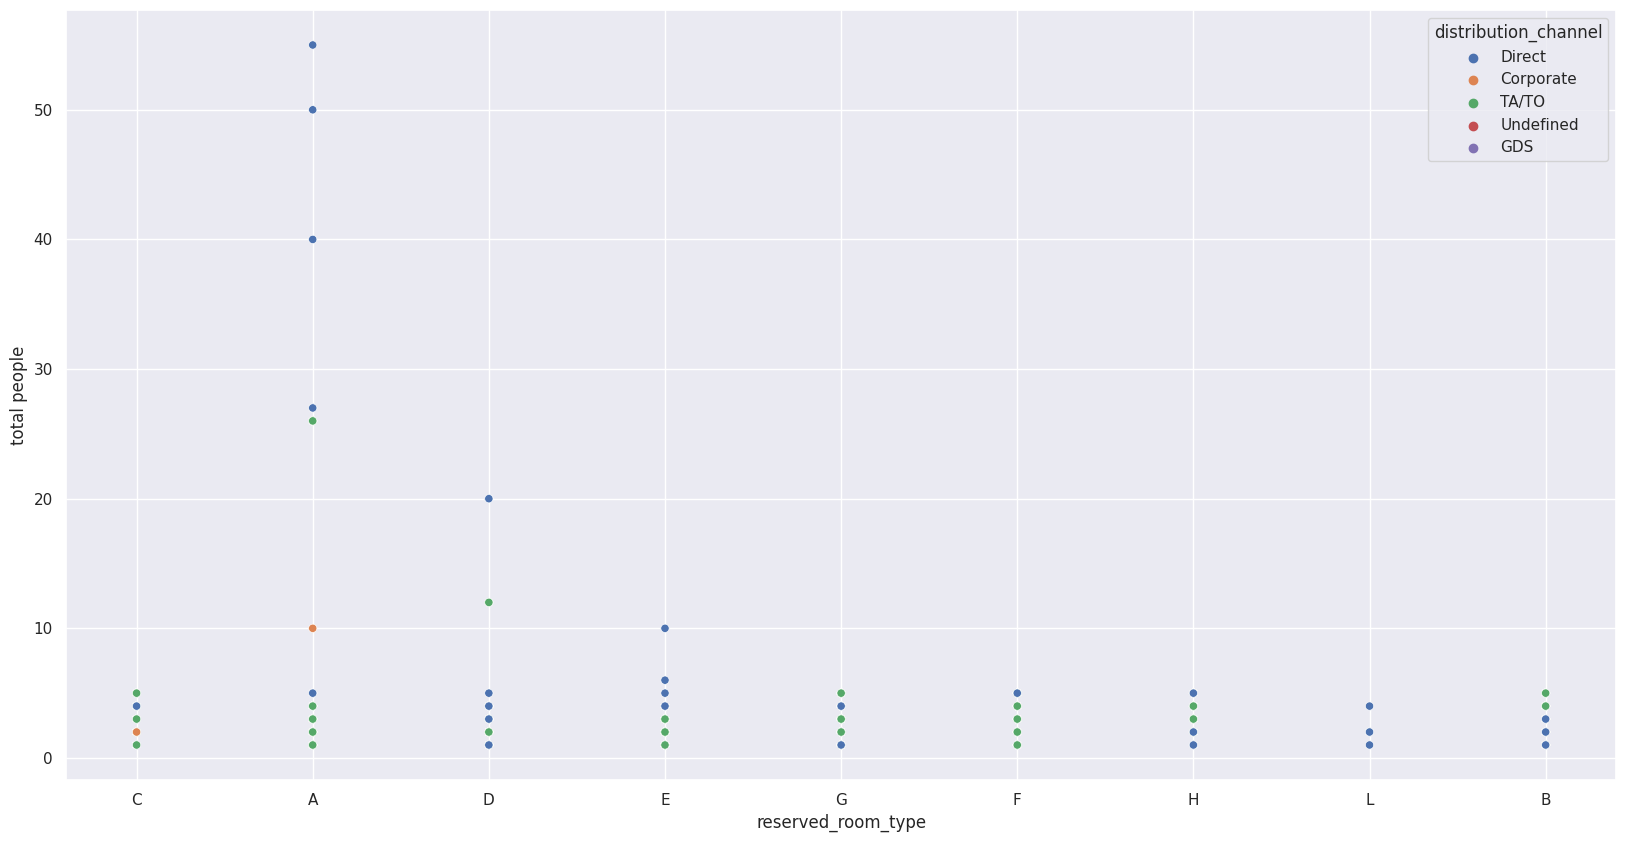

In [46]:
sns.scatterplot(data = df_new, x = 'reserved_room_type', y = 'total people', hue='distribution_channel')

**Observation** : 

* There is strong propensity for the A,D and E reserved_room_type.

* Also, for prescriptive analysis, P category can be evaluated when hotel get more years of data.

* Reserved_room_type A and B is the preferred choice for "Corporate".

### <b> 18. What is the monthly occupancy of the hotel for the threee years of data that we have with us, i.e., for 2015, 2016 and 2017?

Text(0.5, 0, 'MONTHS')

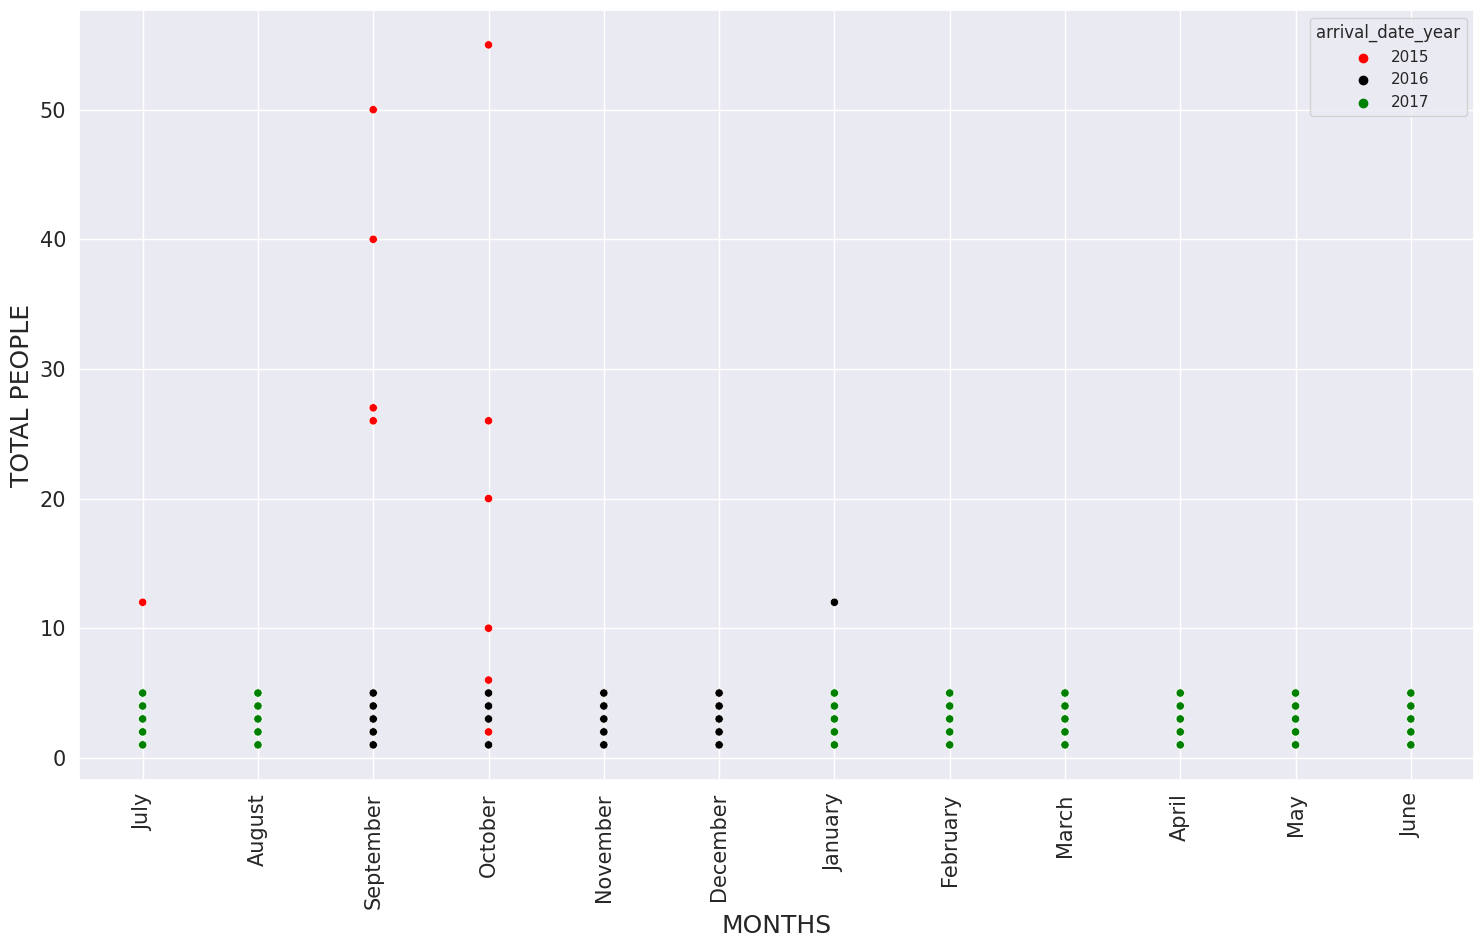

In [47]:
plt.figure(figsize=(18,10))
sns.scatterplot(data = df_new, x = 'arrival_date_month', y = 'total people', hue='arrival_date_year', palette = ['red', 'black', 'green'])
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('TOTAL PEOPLE',fontsize=18)
plt.xlabel('MONTHS',fontsize=18)

**Observation** : 

* For 2015, maximum number of occupancy was there in the months of September and October (2 months).

* Further for 2016, maximum number of occupancy was there in the months of September, October, November and December (4 months), which was better than previous year, 2016.

* Then for the year 2017, good number of occupancy was there in the hotel from January to August. But for the months from Sept to Dec, there was a decline in occupancy of the Hotel.

### <b> 19. Is there any relation between "reserved_room_type", "assigned_room_type" and "is_repeated_guest"?

In [48]:
pd.pivot_table(data = df_new, index = 'reserved_room_type', columns = 'assigned_room_type', values = 'is_repeated_guest', aggfunc = 'sum')

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,1745.0,28.0,56.0,584.0,92.0,44.0,19.0,8.0,37.0,30.0,NaN
B,2.0,11.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN
C,0.0,0.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
D,15.0,4.0,1.0,305.0,13.0,8.0,2.0,0.0,8.0,5.0,NaN
E,0.0,0.0,1.0,1.0,153.0,11.0,4.0,0.0,9.0,2.0,NaN
F,1.0,3.0,NaN,2.0,1.0,55.0,1.0,0.0,1.0,1.0,NaN
G,0.0,0.0,1.0,NaN,2.0,2.0,57.0,0.0,1.0,0.0,NaN
H,NaN,NaN,NaN,0.0,NaN,NaN,1.0,10.0,1.0,NaN,NaN
L,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0


**Observation** : 

* Guests who were assigned the same room which was there at the time of booking, the above Summary clearly depicts that such guests revisited the hotel. 
 
* Focusing not to change the registered room, points towards the growth in revenue and the image of the hotel.

### <b> 20. Which hotel has high chance that its customer will return for another stay?

<function matplotlib.pyplot.show>

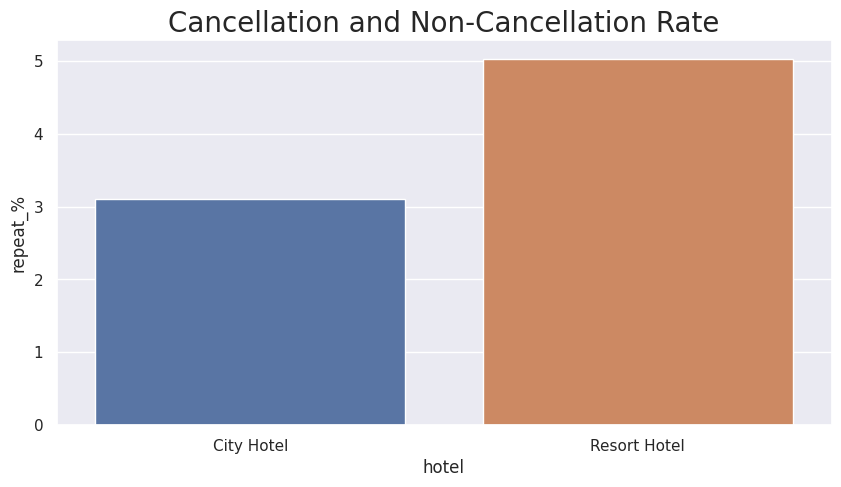

In [49]:
from numpy.core.fromnumeric import repeat
#select and count repeated customers bookings
repeated_cust = df_new[df_new['is_repeated_guest']==1]
repeat_grp = repeated_cust.groupby('hotel')
df2= pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

#count total bookings for each hotel
grouped_by_hotel = df_new.groupby('hotel')
total_booking = grouped_by_hotel.size()
df3= pd.DataFrame(total_booking).rename(columns={0:'total_bookings'})
df4=pd.concat([df2,df3],axis=1)

#calculating repeating percentage
df4['repeat_%'] = round((df4['total_repeated_guests']/df4['total_bookings'])*100,2)
# ploting graph
plt.figure(figsize = (10,5))
sns.barplot(x= df4.index , y=df4['repeat_%'])
plt.title('Cancellation and Non-Cancellation Rate', fontsize=20)
plt.show

**Observation** : 

* As from above bar plot, we can conclude that Resort Hotel has slightly more chance of its customer revisiting as compare to City Hotel.




### <b> 21. Relationship between the repeated guests and previous bookings not canceled.?


In [50]:
rep_guests1 = df_new[df_new['is_repeated_guest']==1]
rep_guests0 = df_new[df_new['is_repeated_guest']==0]

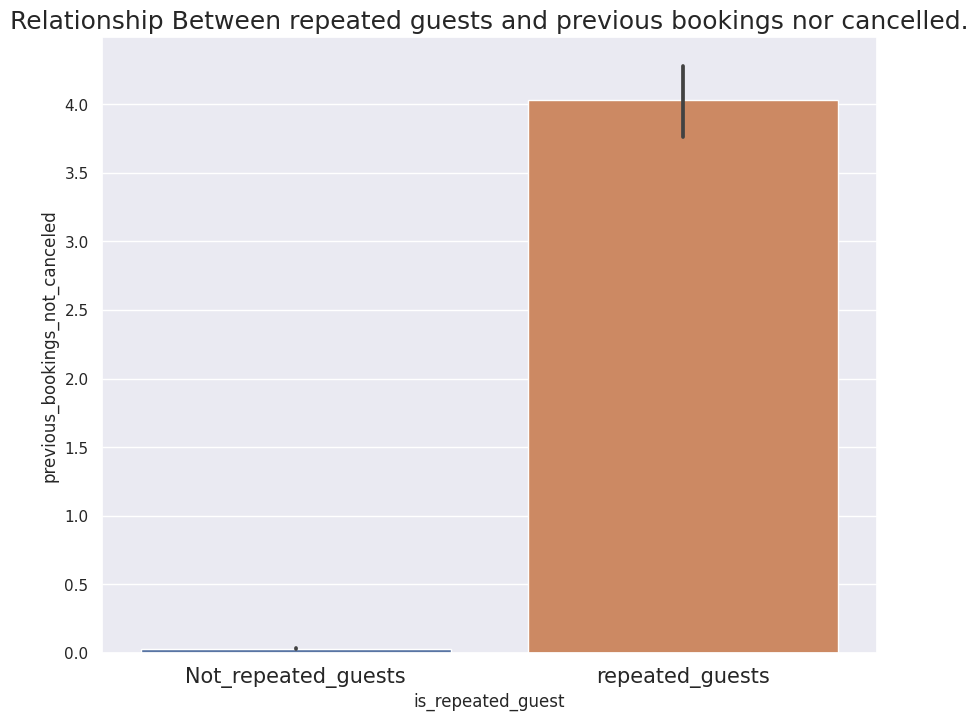

In [51]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_new['is_repeated_guest'],y= df_new['previous_bookings_not_canceled'])
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=15)
plt.title('Relationship Between repeated guests and previous bookings nor cancelled.', fontsize = 18)
plt.show()

**Observation** : 

* Not Repeated guests are more likely to cancel their bookings.


### <b> 22. ADR across different  market segment


Text(0.5, 1.0, 'Adr across market segment')

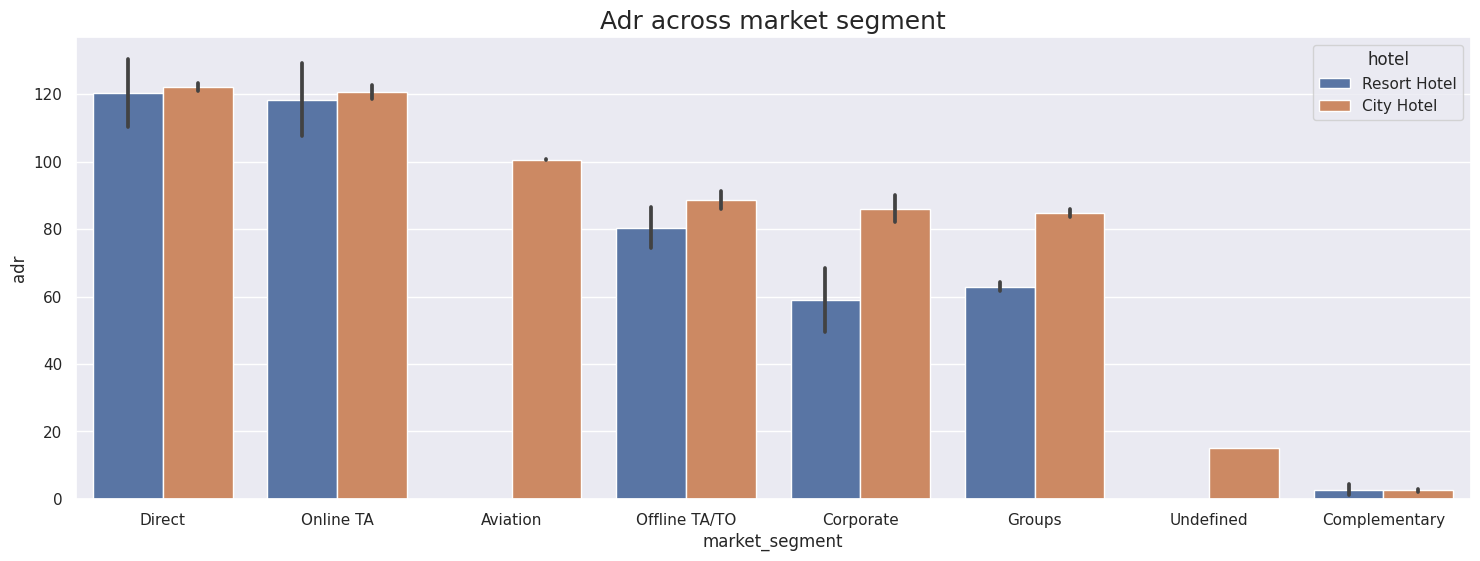

In [52]:
Grupby=df_new.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()   # group by

plt.figure(figsize=(18,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=Grupby.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment', fontsize = 18)


**Obseravtion** : 

* 'Direct' and 'Online TA' are contributing the most in both types of hotels.

* Aviation segment should focus on increasing the bookings of 'City Hotel'

## <b> CONCLUSIONS

1. Around 60% of people prefers City hotel and 40% of people prefers Resort hotel. So the City hotel becomes busiest hotel.

2. Agent no.9 makes most of the bookings. 

3. Most of the customers prefer BB-type Meals.

4. 27.5% of people cancelled their bookings. We have to find out the reasons why these people cancelled their bookings, & one thing also can be done to take feedback from them when they cancel their bookings.

5. Almost 82% of the bookings were not changed by guests.

6. Most of the guests are coming from Portugal i.e more than 25000 guests are Portugal.

7. 2015 had less than 7000 bookings. 2016 had the highest bookings.  overall City hotels had the most of the bookings.

8. July and August months had the most Bookings. Summer vacation can be the reason for the bookings.

9. Transient customer type is more which is 82.4 %. percentage of  Booking associated by the Group is very low.

10. Repeated guests are very few only 3.9 %. To retain the guests, management should take feedback from guests and try to improve the services.

11. 98.7 % of the guests prefer the "No deposit" type of deposit.

12. City hotel has the highest ADR. That means city hotels are generating more revenue than resort hotels. More the ADR, more is the revenue.

13. City hotel has more lead time than a resort hotel.

14.  For Resort hotels ADR is high in June, July, and August as compared to City Hotels. Maybe Customers/People want to spend their Summer vacation in Resorts Hotels.

* The best time for guests to visit Resort or City hotels is January, February, March, April, October, November, and December as the average daily rate in this month is very low.

15.  Guests who were assigned the same room which was there at the time of booking, such guests revisited the hotel. 
 Focusing on not changing the registered room, point towards the growth in revenue and the image of the hotel.

16. Resort Hotel has a slightly more chance of its customer return as compared to City Hotel.

17. Not Repeated guests are more likely to cancel their bookings.

18. Direct' and 'Online TA' are contributing the most to both types of hotels.Aviation segment should focus on increasing the bookings of 'City Hotel.







# **'''THANK YOU'''**